# Tugas Pagerank

1. Buat graph berarah dengan networkx (minimal 9 node )
 * Hitung manual pagerank dari graph yang anda buat
 * Hitung menggunakan pagerank menggunakan networkx

2. Implementasikan ulang  https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb
3. Upload di github repository webstatis masing masing
4.  Beri penjelasan terkait dengan proses 

## Perhitungan Pagerank

### Pembuatan graph (minimal 9 node)

In [41]:
import networkx as nx
import pandas as pd

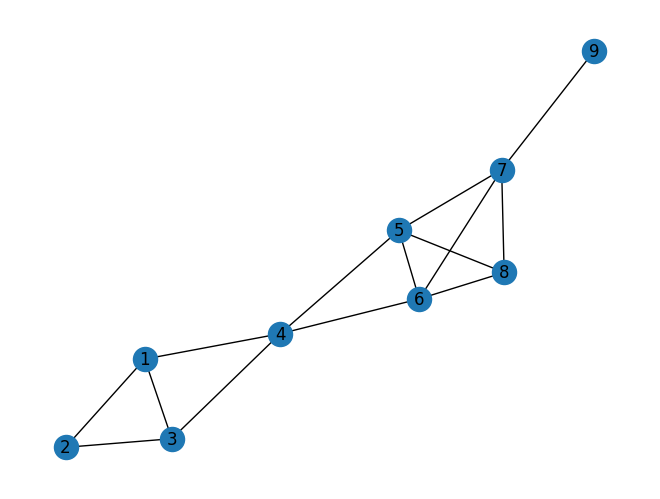

In [42]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4),(4,5),(4,6),(5,6),(5,7),(5,8),(6,5),(6,7),(6,8),(7,8),(7,9)])
nx.draw(G,with_labels=True)

### perhitungan secara manual

In [43]:
d = 0.85 # Damping factor
max_iter = 100 # iterasi maksimum
tolerance = 1.0e-6 # Toleransi konvergensi
N = len(G.nodes())
pagerank = dict.fromkeys(G.nodes(), 1.0/N)
for i in range(max_iter):
    diff = 0
    for node in G.nodes():
        rank = 1 - d
        for neighbor in G.neighbors(node):
            rank += d * pagerank[neighbor] / G.degree(neighbor)
        diff += abs(pagerank[node] - rank)
        pagerank[node] = rank
    if diff < N * tolerance:
        break

print("Manual pagerank:\n", pagerank)

Manual pagerank:
 {1: 0.9976409644640096, 2: 0.7153297101921915, 3: 0.9976414752804466, 4: 1.2280550499924572, 5: 1.2064128853233231, 6: 1.2064130819512038, 7: 1.2882511897618658, 8: 0.9364788958702334, 9: 0.4237533778243965}


### Perhitungan menggunakan Networkx

In [44]:
PageRank = nx.pagerank(G, alpha=0.85)
print("Networkx pagerank:\n", PageRank)

Networkx pagerank:
 {1: 0.11085242532970185, 2: 0.07948362274014723, 3: 0.11085242532970185, 4: 0.13645209029225677, 5: 0.13404444415308828, 6: 0.13404444415308828, 7: 0.14313616991007672, 8: 0.10405142282202429, 9: 0.04708295526991471}


## Implementasi Text Summarization

### Import modul

In [45]:
!pip install PyPDF2
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import numpy as np
import PyPDF2
import docx2txt
import sys
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### Fungsi untuk membaca dokumen

In [47]:
def readDoc(name):

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    # print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r', encoding="utf8")
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb', encoding="utf8")
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    # print(type(document))
    return document

### Fungsi untuk melakukan tokenisasi pada dokumen

In [48]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### Membaca dokumen

In [49]:
document = readDoc('/content/drive/MyDrive/prosaindata/tugas/text-sum.txt')
print('The length of the file is:', end=' ')
print(len(document))

The length of the file is: 525


### Generate list pada setiap kata

In [50]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 72
The size of the item 0 in Bytes is: 307


### Print elemen dalam list

In [51]:
for i in sentences_list:
    print(i)

Ketika matahari mulai muncul,semua
penduduk didaerah pegunungan mulai
melakukan aktifitas,ada yang berangkat ke
sawah,memanen teh di kebun teh,mencuci
pakaian di sungai dan lain lain.Aktifitas aktifitas
seperti itu sudah tidak asing lagi didaerah
pegunungan.
Dan ketika matahari mulai terbenam
semua aktifitas penduduk daerah pegunungan
selesai.Warna langit yang cerah berubah
menjadi kuning.Namun keindahan alam
didaerah pegununggan masih terlihat.sungguh
pemandangan alam yang indah,dan wajib
menjaga dan melestarikan nya.


### Generate term-document matrix (TD matrix)

In [52]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [53]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.15308966 0.32677367 0.         0.15308966 0.15308966 0.
  0.         0.         0.10892456 0.30617933 0.21784911 0.
  0.15308966 0.15308966 0.15308966 0.         0.10892456 0.
  0.15308966 0.30617933 0.         0.         0.10892456 0.15308966
  0.         0.15308966 0.15308966 0.         0.         0.21784911
  0.15308966 0.         0.         0.15308966 0.21784911 0.
  0.         0.10892456 0.15308966 0.         0.10892456 0.15308966
  0.15308966 0.15308966 0.         0.30617933 0.         0.
  0.15308966 0.         0.         0.10892456]
 [0.         0.11919696 0.33505433 0.         0.         0.16752717
  0.16752717 0.16752717 0.35759088 0.         0.11919696 0.16752717
  0.         0.         0.         0.16752717 0.11919696 0.16752717
  0.         0.         0.16752717 0.16752717 0.11919696 0.
  0.16752717 0.         0.         0.16752717 0.16752717 0.11919696
  0.         0.16752717 0.16752717 0.         0.11919696 0.16752717
  0.16752717 0.11919696 0.         0.16752717 0.1

In [54]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <52x2 sparse matrix of type '<class 'numpy.float64'>'
	with 62 stored elements in Compressed Sparse Column format>>


### Menentukan Rank untuk Setiap Kalimat Menggunakan textrank

In [55]:
nx_graph = nx.from_scipy_sparse_array(res_graph)
ranks = nx.pagerank(nx_graph)

# Analisis tipe data dari rank
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print ranks
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 232
0 0.49999999999999994
1 0.5000000000000001


### Menemukan Kalimat Penting dan Menentukan Kesimpulan

In [56]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [57]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))
threshold = (sum(temp_array) / len(temp_array)) + 0.2
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

### Menjadikan Kesimpulan ke dalam File Baru

In [58]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('final.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

Dan ketika matahari mulai terbenam
semua aktifitas penduduk daerah pegunungan
selesai.Warna langit yang cerah berubah
menjadi kuning.Namun keindahan alam
didaerah pegununggan masih terlihat.sungguh
pemandangan alam yang indah,dan wajib
menjaga dan melestarikan nya.


<function TextIOWrapper.close()>

In [59]:
for i in sentence_list:
    print(i)

Dan ketika matahari mulai terbenam
semua aktifitas penduduk daerah pegunungan
selesai.Warna langit yang cerah berubah
menjadi kuning.Namun keindahan alam
didaerah pegununggan masih terlihat.sungguh
pemandangan alam yang indah,dan wajib
menjaga dan melestarikan nya.
